# Lecture 22

## 9.4: Module 9 Notebook 4 ##

In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Helper Function We Previously Defined

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

# Residuals

## Visual Diagnostics

In [3]:
# Let's define a function to compute residuals

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions # residuals = observed y - estimated y

### Ex. 1: Demographics of voters 2016

In [4]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [5]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [6]:
# We will now compute the residuals and 
# add them to our demographics table

demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


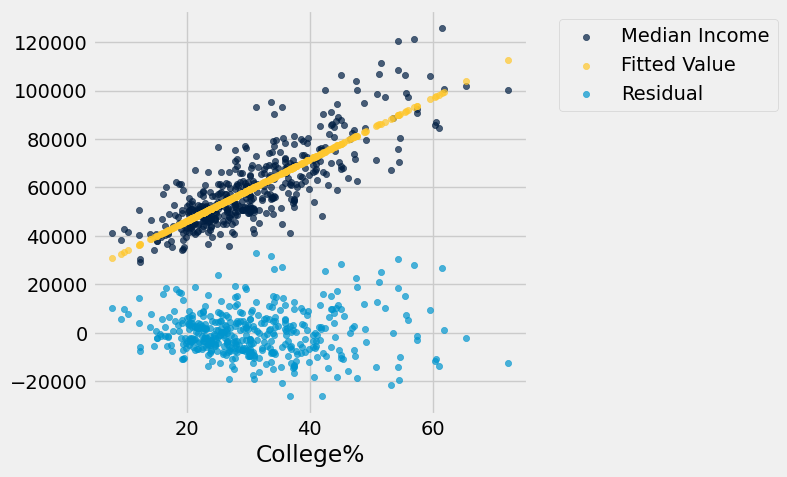

In [7]:
# Let's visualize the data, median income against college% (i.e., median income),
# the predicted income (i.e., fitted value),
# and the residuals (i.e, redidual)
demographics.scatter('College%')

In [8]:
# Let's define a function to plot 
# residuals after computing them
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual', color='r')
    x_array = t.column(x)
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)

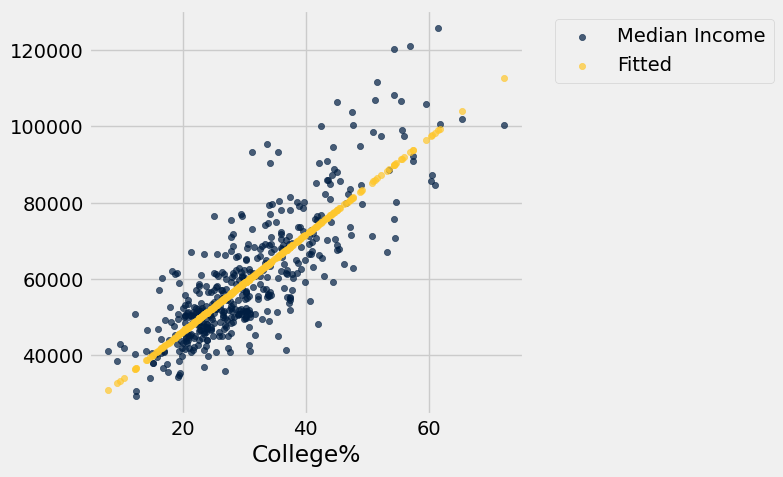

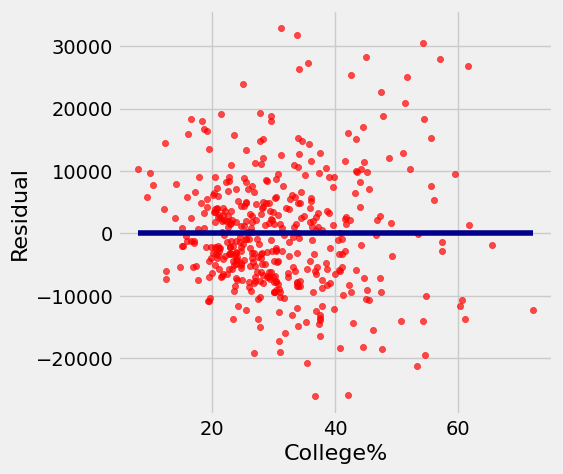

In [9]:
plot_residuals(demographics, 'College%', 'Median Income')

In [10]:
# Residual plots help us make visual assessments 
# of the quality of a linear regression analysis. 
# Such assessments are called diagnostics.

# With the above plot, the linear predictor appears 
# not to be evenly accurate for all values of college%.

# In this case, the residual plot helps us detect Heteroscedasticity.
# Notice how the residual plot flares out towards the high end of the college%. 
# In other words, the variability in the size of the errors is 
# greater for high values of college% than for low values. 

# Uneven variation is often more easily noticed in a 
# residual plot than in the original scatter plot.

# If the residual plot shows uneven variation about the 
# horizontal line at 0, the regression estimates are 
# not equally accurate across the range of the predictor variable.

### Ex. 2: Galton's parent and child height dataset

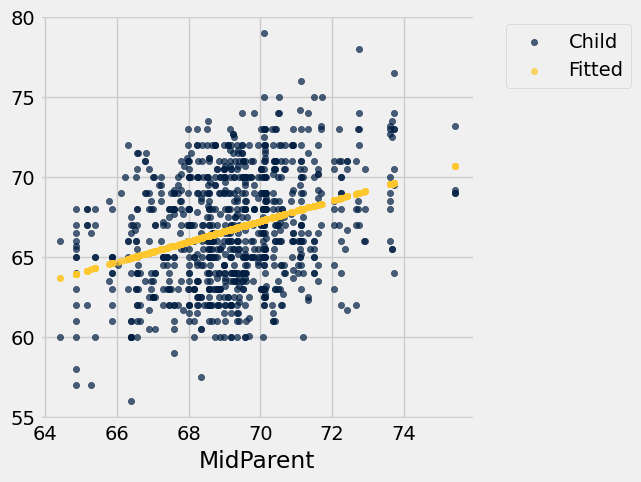

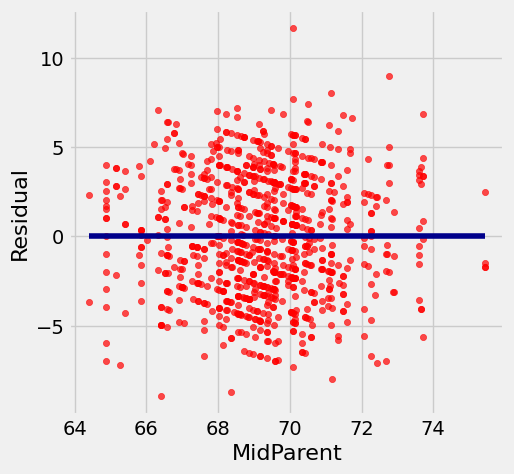

In [11]:
# Let's visualize the residual plot from the Galton dataset

# Remember, x (the predictor variable), is the midparent height,
# and y, (the response variable), is the child's height
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

In [ ]:
# In this case, the residual plot indicates that 
# linear regression was a reasonable method of estimation. 

# Notice how the residuals are distributed fairly symmetrically 
# above and below the horizontal line at 0, 
# corresponding to the original scatter plot 
# being roughly symmetrical above and below. 

# Notice also that the vertical spread of the plot is 
# fairly even across the most common values of the children's heights. 
# In other words, apart from a few outlying points, 
# the plot isn't narrower in some places and wider in others.

# In summary, the accuracy of the regression 
# appears to be about the same across the 
# observed range of the predictor variable (i.e., midparent's height).

# Takeaway: the residual plot of a *good regression shows no pattern*. 
# The residuals look about the same, 
# above and below the horizontal line at 0, 
# across the range of the predictor variable.

### Ex. 3: Dugongs ##

In [ ]:
# Residual plots can also help us detect non-linearlity.

# While drawing the scatter plot of the data 
# usually gives an indication of whether the relation 
# between the two variables is non-linear, 
# often, it is easier to spot non-linearity in a 
# residual plot than in the original scatter plot. 

# This is usually because of the scales of the two plots: 
# the residual plot allows us to zoom in on the errors 
# and hence makes it easier to spot patterns.

# Let's see an example

In [12]:
# We will attempt to predict the age of a dugong given its length
# Dugongs are marine mammals related to manatees and sea cows

dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


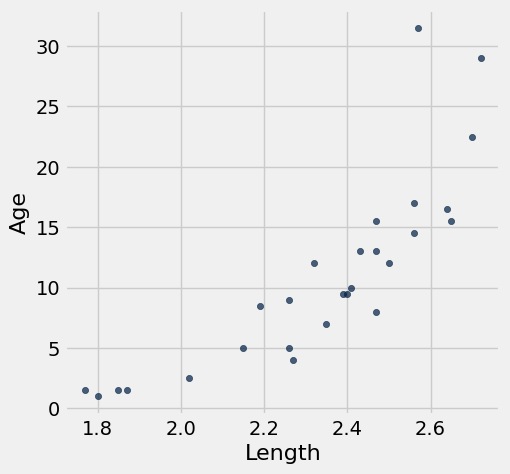

In [13]:
dugong.scatter('Length', 'Age')

In [14]:
# Let's compute the correlation
correlation(dugong, 'Length', 'Age')

0.82964745549057139

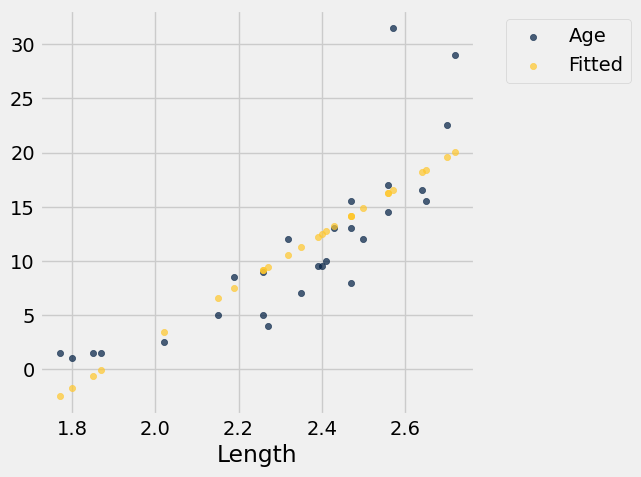

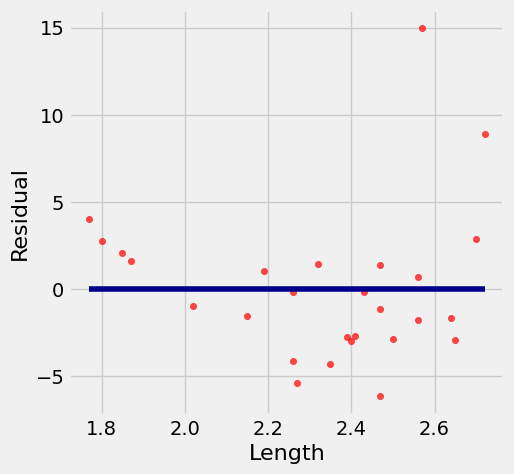

In [15]:
plot_residuals(dugong, 'Length', 'Age')

In [ ]:
# Despite the high correlation, 
# the above plot shows a curved pattern 
# that is much more visible in the residual plot.

### Ex. 4: US Women

In [ ]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

In [ ]:
correlation(us_women, 'height', 'ave weight')

In [ ]:
us_women = us_women.with_columns('fitted-weight', fitted_values(us_women, 'height', 'ave weight'), 
                                 'residual', residuals(us_women, 'height', 'ave weight'))
us_women

In [ ]:
# us_women.scatter('height', 'ave weight')

In [ ]:
plot_residuals(us_women, 'height', 'ave weight')

## Numerical Diagnostics - Properties of Residuals

In [ ]:
# In addition to visualization, 
# we can use numerical properties of residuals 
# to assess the quality of regression. 

# We will not prove these properties mathematically. 
# Rather, we will observe them by computation and 
# see what they tell us about the regression.

### 1. Average of Residuals ##

**No matter what the shape of the scatter diagram, the average of the residulas is 0**

In [16]:
round(np.average(residuals(dugong, 'Length', 'Age')), 10)

0.0

In [17]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 12)

0.0

In [18]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

### 2.  Residual Plots Show No Trend

**For every linear regression, whether good or bad, the residual plot shows no trend. 
Overall, it is flat. In other words, the residuals and the *predictor variable* are uncorrelated.**

In [19]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)


In [20]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [21]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0

In [22]:
dugong = dugong.with_columns(
       'Fitted Value', fitted_values(dugong, 'Length', 'Age'),
       'Residual', residuals(dugong, 'Length', 'Age')
)
round(correlation(dugong, 'Length', 'Residual'), 10)

0.0

In [ ]:
demographics_all = Table.read_table('district_demographics2016.csv')
demographics = demographics_all.drop(
    'State', 'District', 'Percent voting for Clinton')

# demographics = add_regression_to_table(
#     demographics, 'College%', 'Median Income'
# )
demographics = demographics.with_columns('Fitted value', fitted_values(demographics, 'College%', 'Median Income'),
                                                                      'Residual', residuals(demographics, 'College%', 'Median Income'))

In [ ]:
np.round(correlation(demographics, 'College%', 'Median Income'), 6)

In [ ]:
np.round(correlation(demographics, 'Fitted value', 'Residual'), 6)

In [ ]:
np.round(correlation(demographics, 'College%', 'Residual'), 6)

In [ ]:
np.round(correlation(us_women, 'height', 'ave weight'), 6)

In [ ]:
np.round(correlation(us_women, 'residual', 'height'), 6)

In [ ]:
np.round(correlation(us_women, 'residual', 'fitted-weight'), 6)

### 3. SD of Residuals ##

#### Correlation as a  Measure of Clustering

“The correlation coefficient measures how clustered the  points are about a straight line.”
We can now quantify this statement.

In [23]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

##### Ex. 1: Galton's height dataset

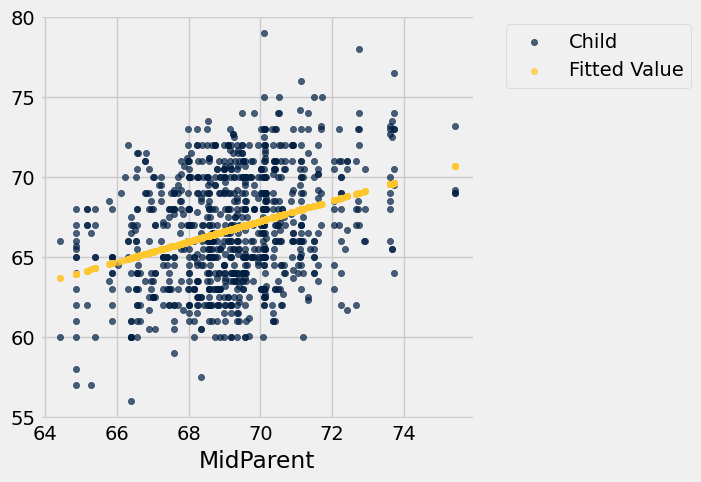

In [24]:
plot_fitted(heights, 'MidParent', 'Child')

In [25]:
child_predictions_sd = np.std(fitted_values(heights, 'MidParent', 'Child'))
child_observed_sd = np.std(heights.column('Child'))
print(child_predictions_sd)
print(child_observed_sd)

1.14814516838
3.57733460101


In [26]:
child_predictions_sd / child_observed_sd

0.32094989606395957

In [27]:
correlation(heights, 'MidParent', 'Child')

0.32094989606395924

##### Ex. 2: Dugong's age vs length

In [28]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

In [29]:
dugong_prediction_sd = np.std(fitted_values(dugong, 'Length', 'Age'))
dugong_observed_sd = np.std(dugong.column(1))
dugong_prediction_sd / dugong_observed_sd

0.82964745549057128

##### Ex. 3: Hybrid cars' dataset, acceleration vs mpg

In [30]:
hybrid = Table.read_table('hybrid.csv')
hybrid.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


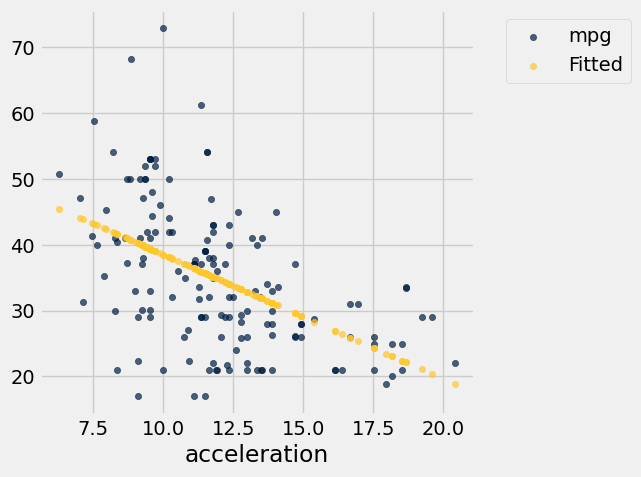

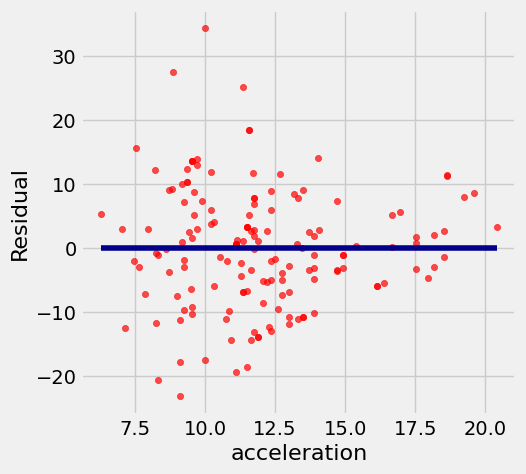

In [31]:
plot_residuals(hybrid, 'acceleration', 'mpg')

In [32]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [33]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

##### Ex. 4: Demographics of voters in US districts in 2016 (demographics dataset) 

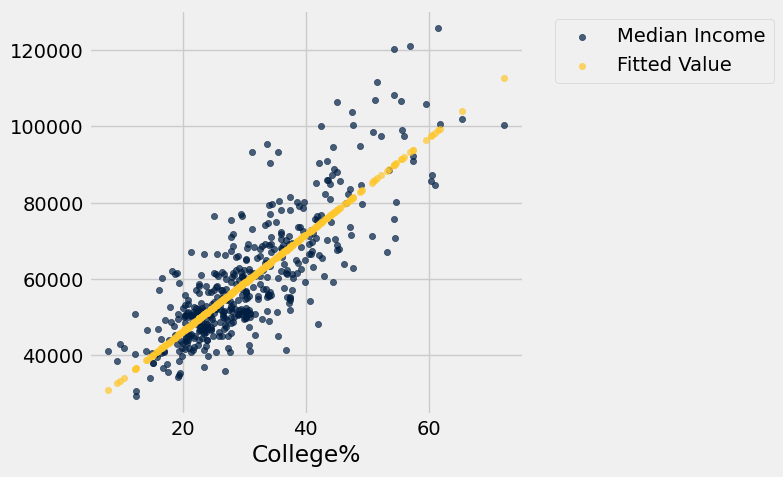

In [34]:
demographics.drop('Residual').scatter('College%')

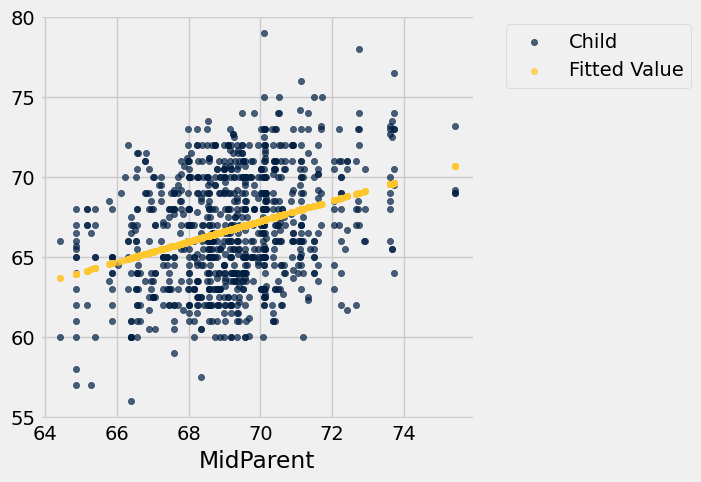

In [35]:
heights.drop('Residual').scatter('MidParent')

In [36]:
income_obs_sd = np.std(demographics.column('Median Income'))
income_obs_sd

16357.858546788269

In [39]:
income_pred_sd = np.std(fitted_values(demographics, 'College%', 'Median Income'))
income_pred_sd

13388.33226985783

In [40]:
income_pred_sd / income_obs_sd

0.81846485171413341

In [41]:
r_demographics = correlation(demographics, 'College%', 'Median Income')
r_demographics

0.81846485171413352

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

(*slides after this*)

#### SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

##### Ex. 1: Galton's height dataset

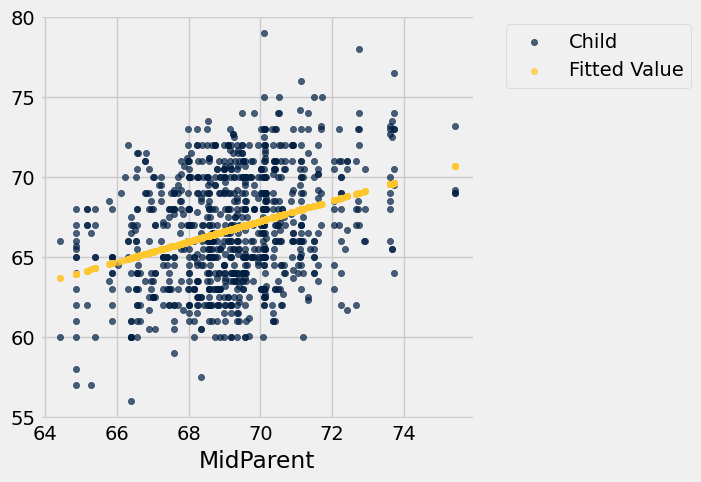

In [42]:
plot_fitted(heights, 'MidParent', 'Child')

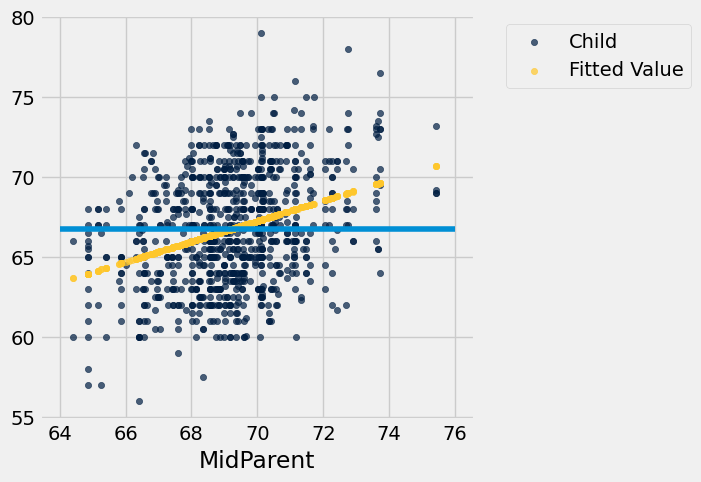

In [43]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

First, we compute the **variance**

In [44]:
np.std(heights.column('Child')) ** 2 # of the child's actual height, i.e., actual_y

12.797322847553064

In [45]:
np.std(heights.column('Fitted Value')) ** 2 # of the child's predicted/estimated height, i.e., estimated_y

1.3182373276715966

In [46]:
np.std(residuals(heights, 'MidParent', 'Child')) ** 2 # of the residuals, i.e., actual_y - estimated_y

11.479085519881471

Now, let's get to it using the formula $$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

In [47]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [48]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.3880799163953421

Recap/summary

In [49]:
height_residual_sd = np.std(heights.column('Residual'))
height_obs_sd = np.std(heights.column('Child'))
height_residual_sd / height_obs_sd # SD of the residual divided by SD of the observed y

0.947096174744959

In [50]:
r_heights = correlation(heights, 'MidParent', 'Child')
np.sqrt(1-r_heights**2) # relationship between SD of residuals and Sd of observed y is a fraction, 1-r**2

0.94709617474495889

##### Ex. 2: Dugongs

In [51]:
np.std(residuals(dugong, 'Length', 'Age'))

4.3113328602881555

In [52]:
np.sqrt(1 - correlation(dugong, 'Length', 'Age')**2)*np.std(dugong.column('Age'))

4.3113328602881564

##### Ex. 3: Hybrid cars - accelaration vs mpg

In [ ]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

In [ ]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

In [ ]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))